# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

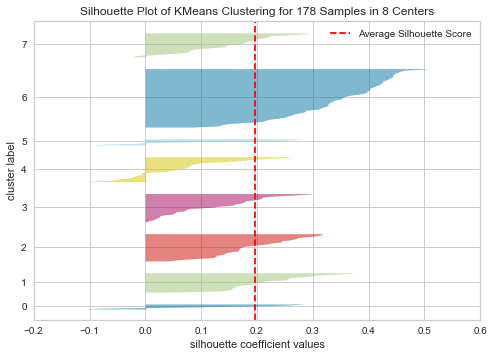

For n_clusters = 8, silhouette score is 0.19117047302556836)


In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Instantiate the clustering model and visualizer
model = KMeans(8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

preds = model.fit_predict(X)
centers = model.cluster_centers_

score = silhouette_score(X, preds, metric='euclidean')
print ("For n_clusters = 8, silhouette score is {})".format(score))

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

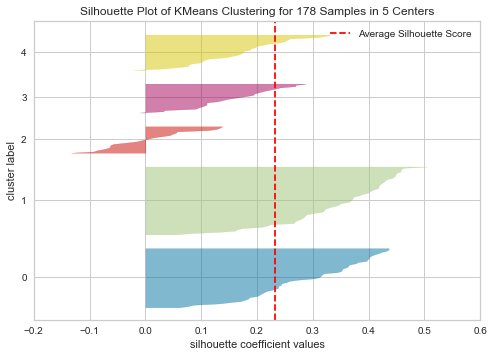

For n_clusters = 5, silhouette score is 0.18940625908344802)


In [12]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

preds = model.fit_predict(X)
#centers = model.cluster_centers_

score = silhouette_score(X, preds, metric='euclidean')
print ("For n_clusters = 5, silhouette score is {})".format(score))

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

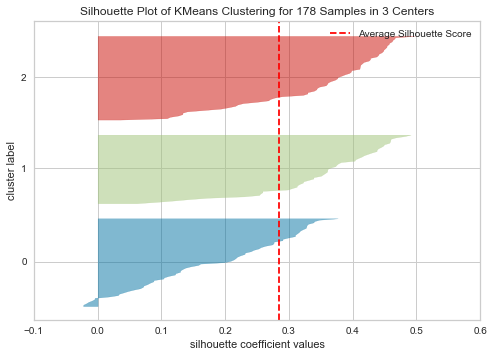

For n_clusters = 3, silhouette score is 0.2848589191898987)


In [14]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

preds = model.fit_predict(X)
centers = model.cluster_centers_

score = silhouette_score(X, preds, metric='euclidean')
print ("For n_clusters = 3, silhouette score is {})".format(score))

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

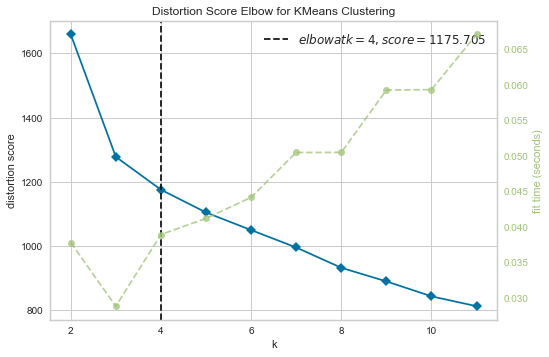

In [15]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


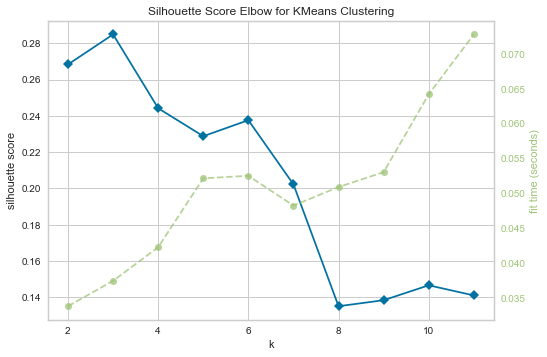

In [16]:
# Instantiate the clustering model and visualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(2,12), metric='silhouette') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


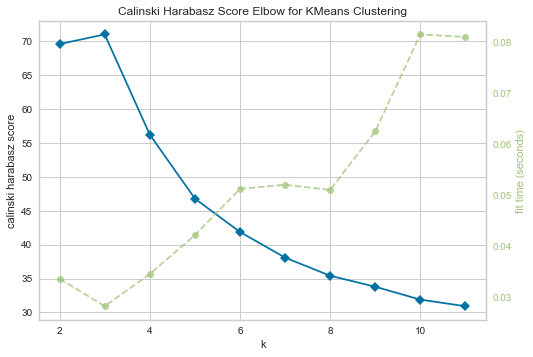

In [17]:
# Instantiate the clustering model and visualizer
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(2,12),metric='calinski_harabasz') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

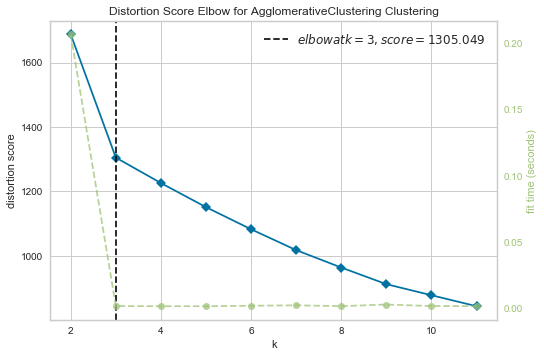

In [18]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering()
visualizer = KElbowVisualizer(model_agg, k=(2,12), metric='distortion') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


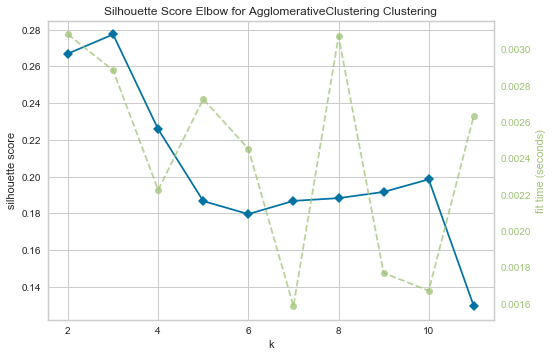

In [19]:
visualizer = KElbowVisualizer(model_agg, k=(2,12), metric='silhouette') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


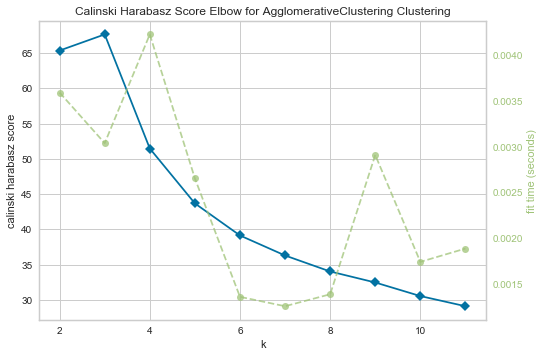

In [20]:
visualizer = KElbowVisualizer(model_agg, k=(2,12), metric='calinski_harabasz') #nb de K à analyser

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

<Figure size 720x432 with 0 Axes>

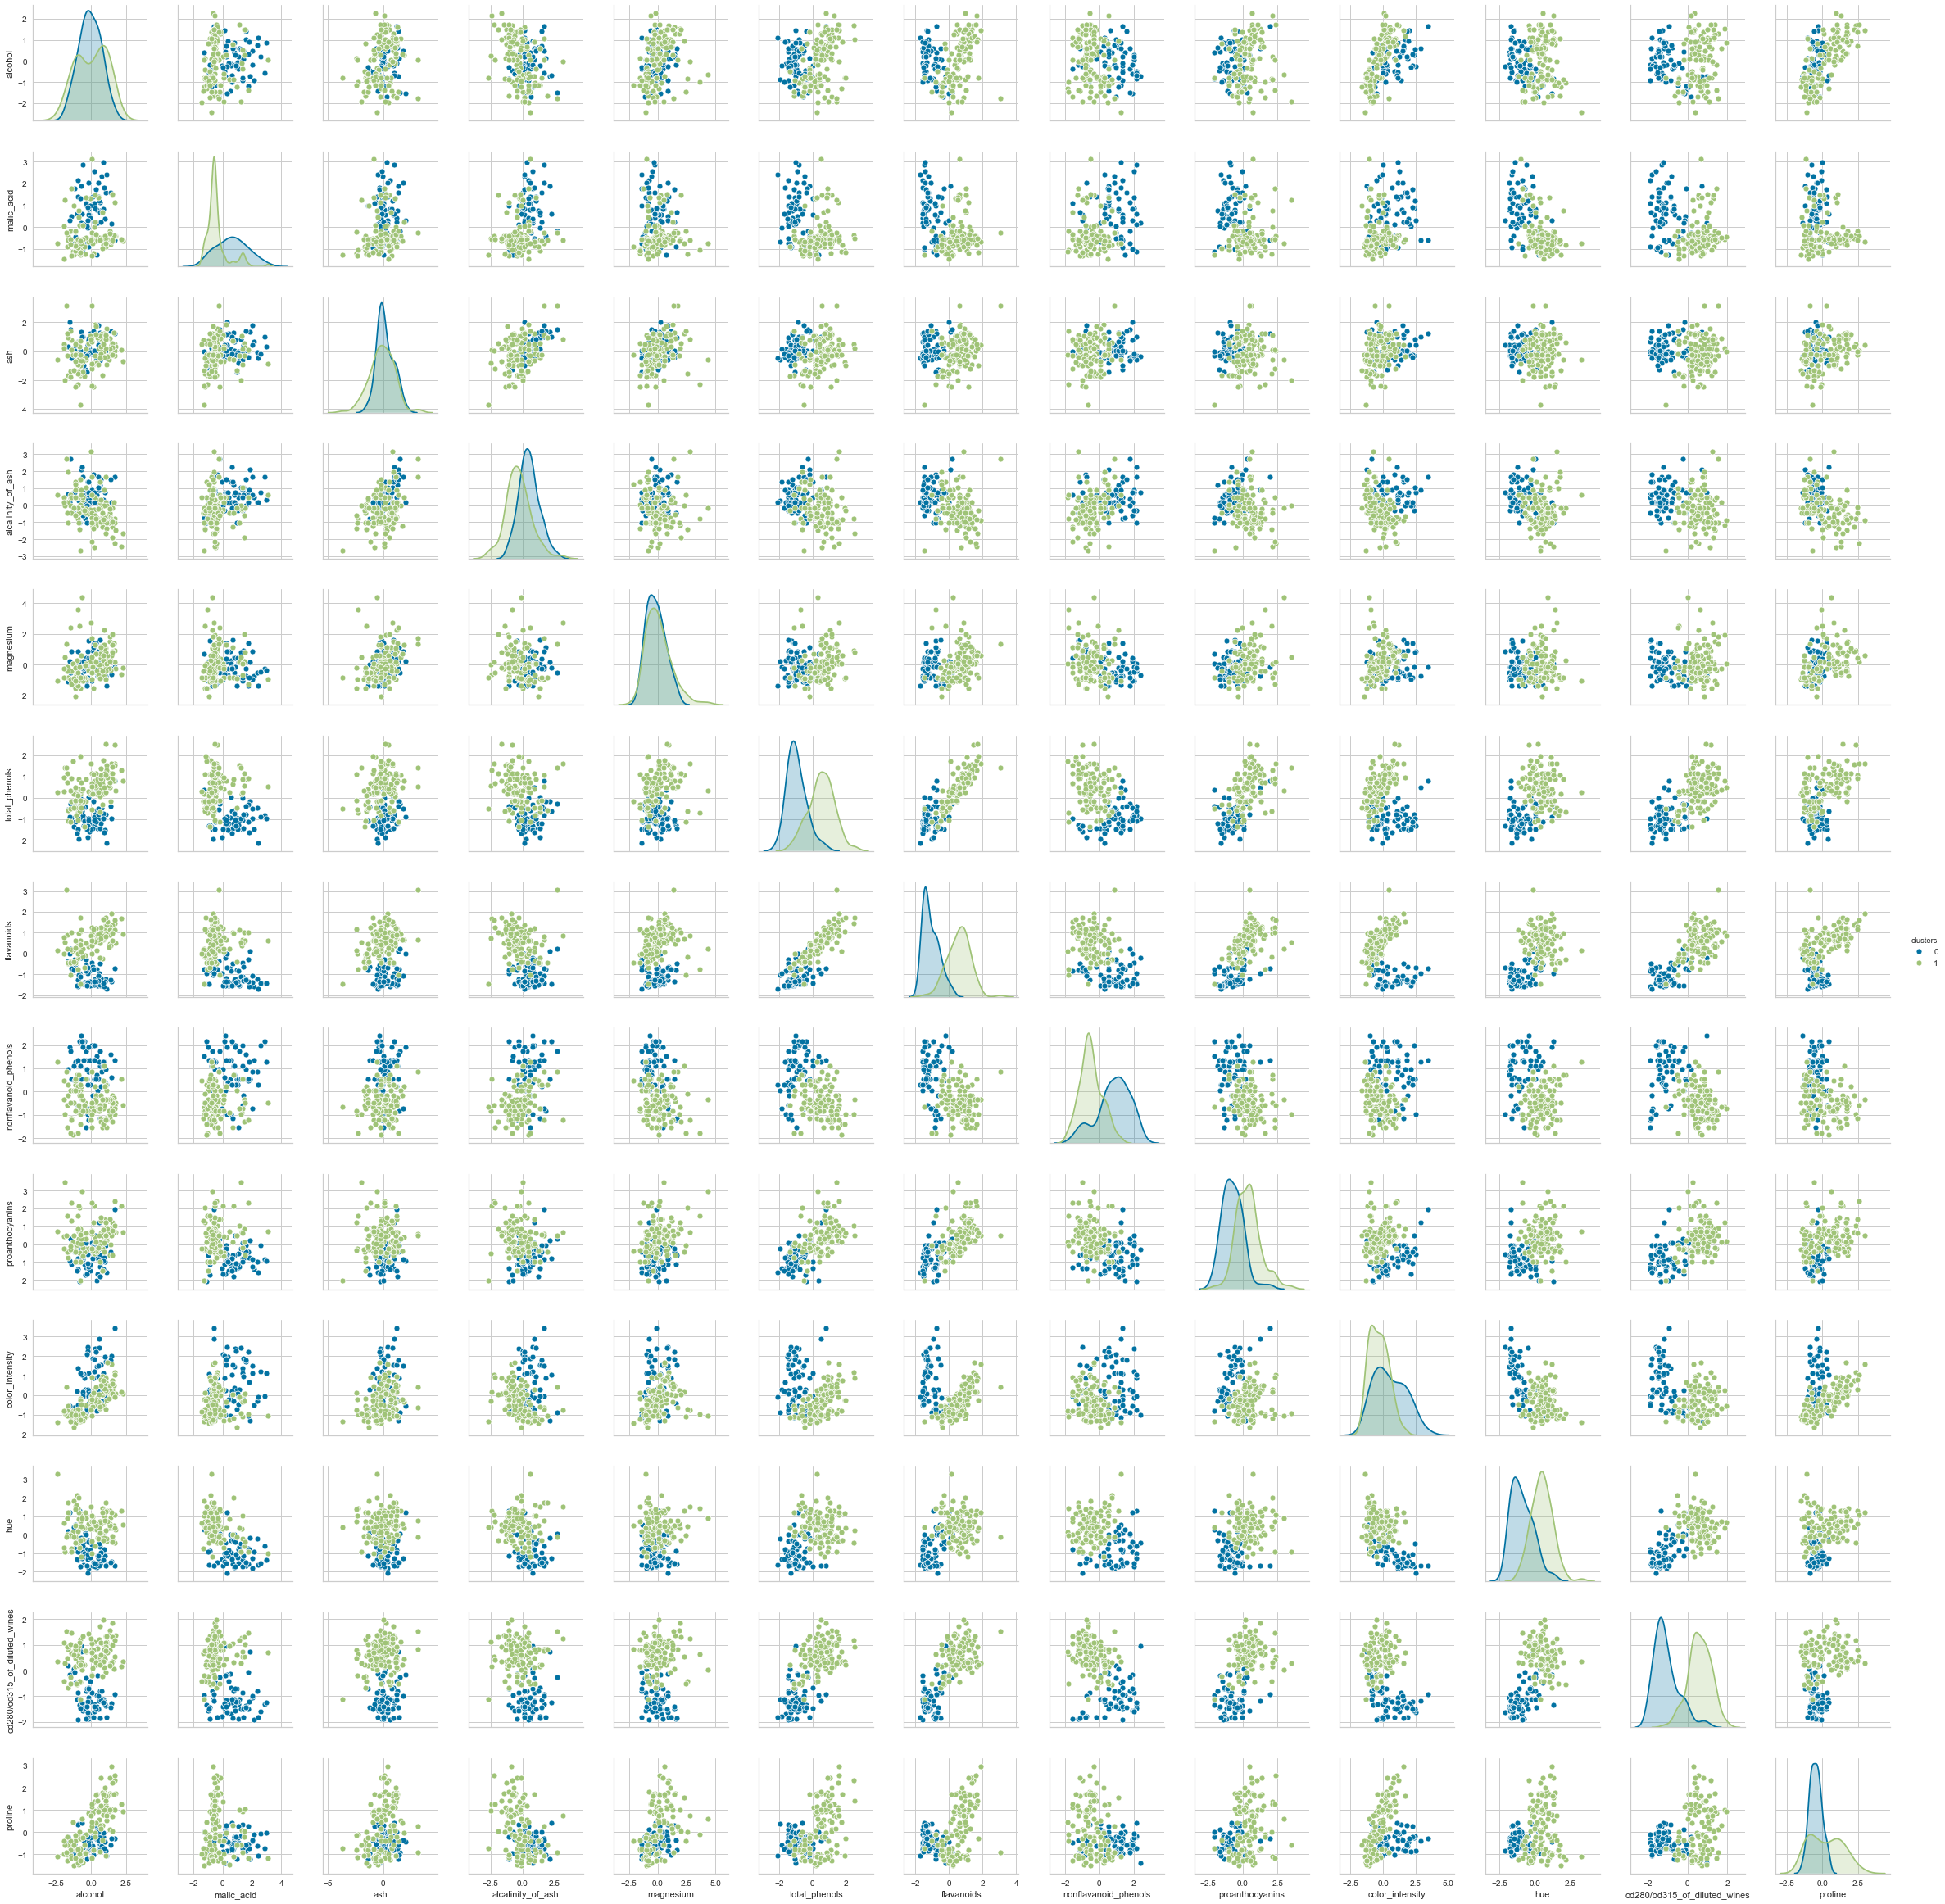

In [23]:
import seaborn as sns

df_X = pd.DataFrame(X, columns=data["feature_names"])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df_X['clusters'] = kmeans.predict(X)

plt.figure(figsize=(10,6))
sns.pairplot(df_X, vars=['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline'], hue='clusters')

<Figure size 720x432 with 0 Axes>

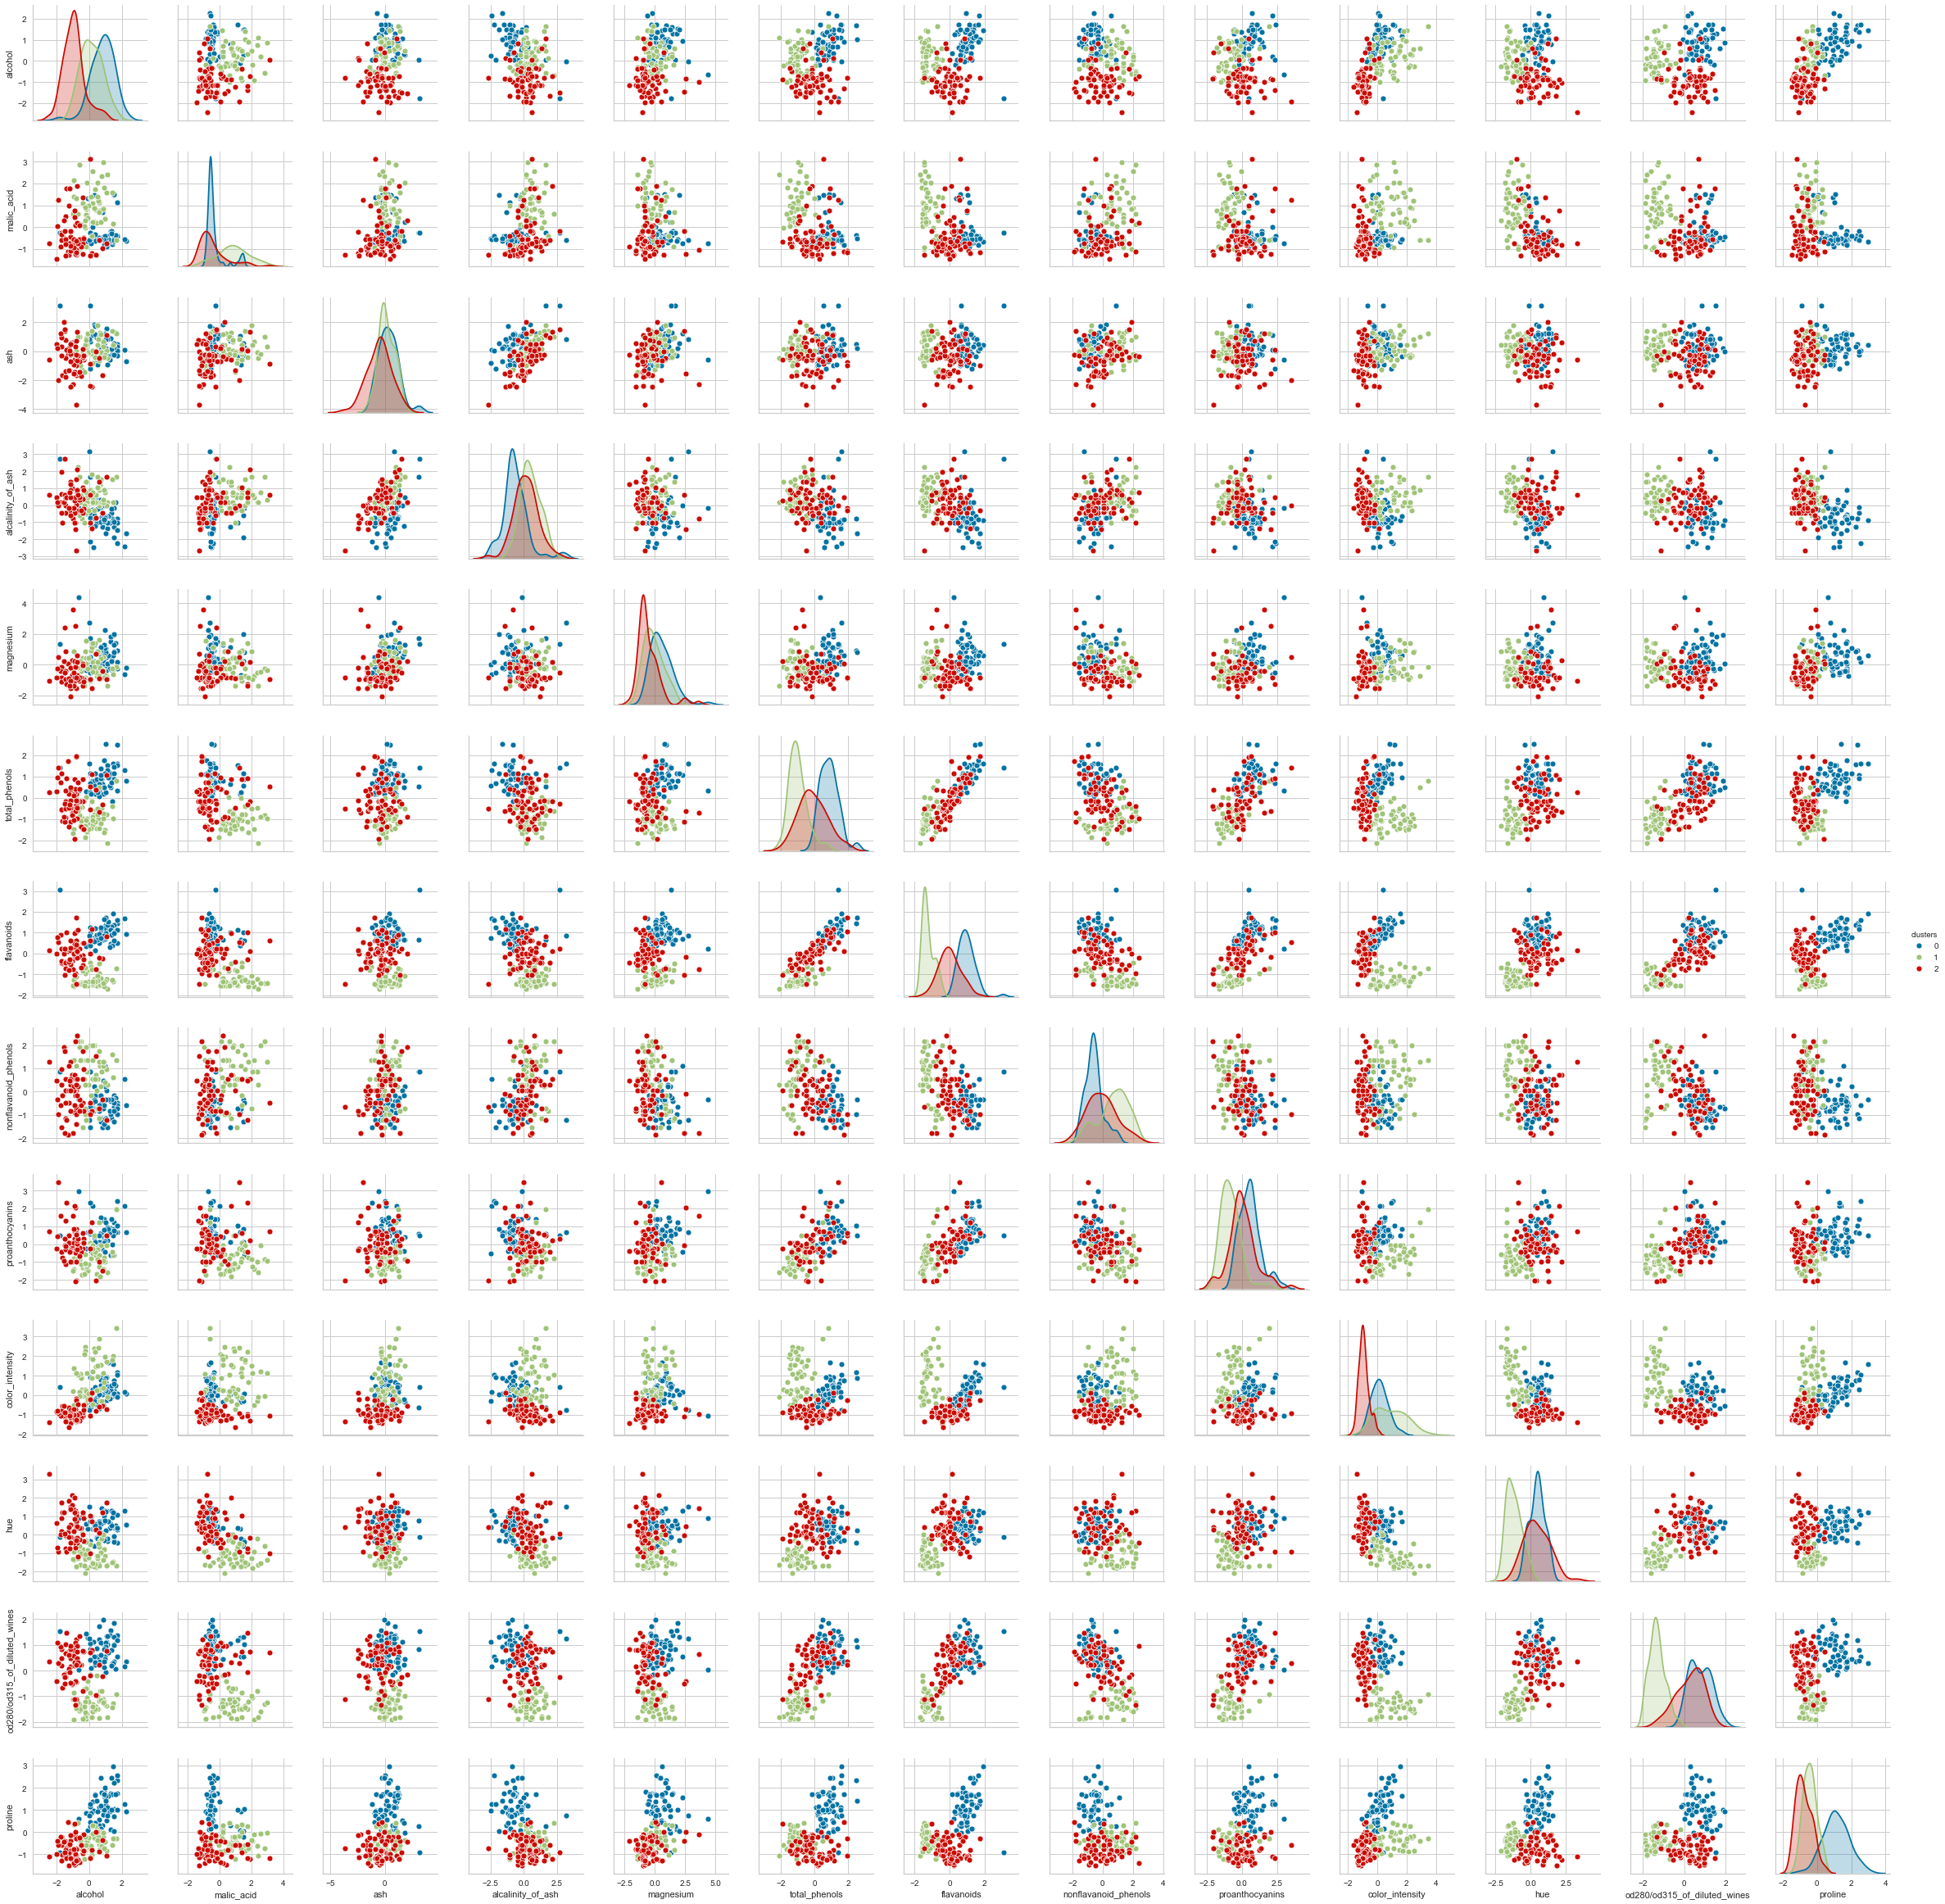

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df_X['clusters'] = kmeans.predict(X)

plt.figure(figsize=(10,6))
sns.pairplot(df_X, vars=['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline'], hue='clusters')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

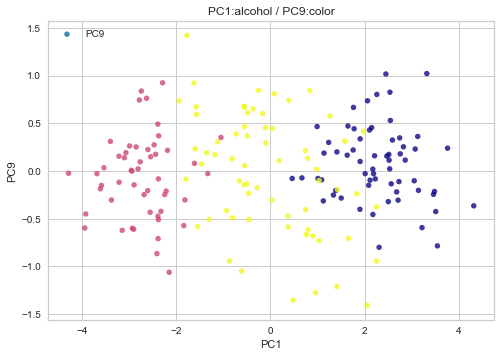

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

PCA_DF1=pd.DataFrame([pca_X[:, 0], pca_X[:, 9]]).T #je choisis de créer un df avec les 2 1eres variables de X
PCA_DF1.columns=['PC1','PC9'] #je renomme les colonnes

#pour faire une distinction des différents clusters (couleurs) j'ajoute les clusters trouvés dans la prédiction
    #j'ajoute la colonne avec la méthode de concaténation
PCA_DF1=pd.concat([PCA_DF1,df_X['clusters']],axis=1)

#je crée un format de figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#je créer le graph du résultat de la PCA
ax.scatter('PC1','PC9',data=PCA_DF1, alpha=0.8, c='clusters', edgecolors='none', s=30, cmap='plasma')
ax.set_xlabel("PC1")
ax.set_ylabel("PC9")

plt.title('PC1:alcohol / PC9:color')
plt.legend(loc=2)

#j'affiche mon graph

plt.show()

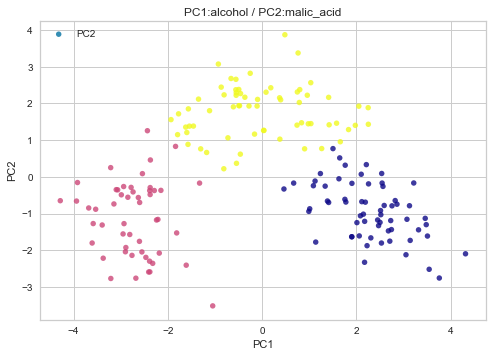

In [44]:
PCA_DF=pd.DataFrame([pca_X[:, 0], pca_X[:, 1]]).T #je choisis de créer un df avec les 2 1eres variables de X
PCA_DF.columns=['PC1','PC2'] #je renomme les colonnes

#pour faire une distinction des différents clusters (couleurs) j'ajoute les clusters trouvés dans la prédiction
    #j'ajoute la colonne avec la méthode de concaténation
PCA_DF=pd.concat([PCA_DF,df_X['clusters']],axis=1)

#je crée un format de figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#je créer le graph du résultat de la PCA
ax.scatter('PC1','PC2',data=PCA_DF, alpha=0.8, c='clusters', edgecolors='none', s=30, cmap='plasma')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.title('PC1:alcohol / PC2:malic_acid')
plt.legend(loc=2)

#j'affiche mon graph

plt.show()

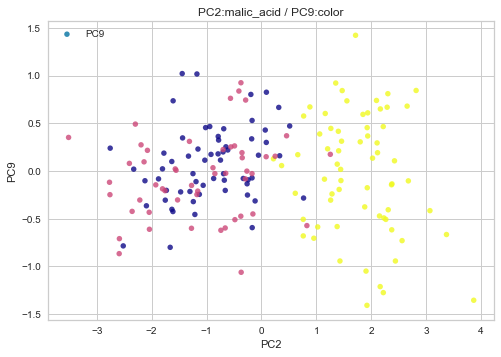

In [43]:
PCA_DF2=pd.DataFrame([pca_X[:, 1], pca_X[:, 9]]).T #je choisis de créer un df avec les 2 1eres variables de X
PCA_DF2.columns=['PC2','PC9'] #je renomme les colonnes

#pour faire une distinction des différents clusters (couleurs) j'ajoute les clusters trouvés dans la prédiction
    #j'ajoute la colonne avec la méthode de concaténation
PCA_DF2=pd.concat([PCA_DF2,df_X['clusters']],axis=1)

#je crée un format de figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#je créer le graph du résultat de la PCA
ax.scatter('PC2','PC9',data=PCA_DF2, alpha=0.8, c='clusters', edgecolors='none', s=30, cmap='plasma')
ax.set_xlabel("PC2")
ax.set_ylabel("PC9")

plt.title('PC2:malic_acid / PC9:color')
plt.legend(loc=2)

#j'affiche mon graph

plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

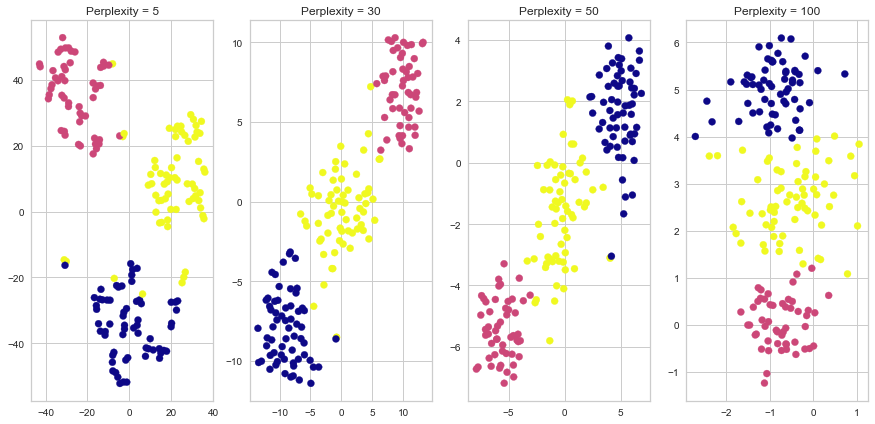

In [42]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=df_X['clusters'], cmap='plasma')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()
